In [1]:
%matplotlib widget
import spectral as spy
import spectral.io.envi as envi

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import japanize_matplotlib

from PIL import Image
import csv
import mplcursors

from scipy.signal import argrelmax

In [6]:
HDR_PATH_iphone = '/data/iphone_blue_200_stegano_2023-08-07_010/results/REFLECTANCE_2023-08-07_010.hdr'
HDR_PATH_pixel = '/data/pixel_blue_200_stegano_2023-08-07_007/results/REFLECTANCE_2023-08-07_007.hdr'
HDR_PATH_huawei = '/data/huawei_blue_200_stegano_2023-08-07_008/results/REFLECTANCE_2023-08-07_008.hdr'

IMG_PATH_iphone = '/data/iphone_blue_200_stegano_2023-08-07_010/results/REFLECTANCE_2023-08-07_010.png'
IMG_PATH_iphone_RGB = '/data/iphone_blue_200_stegano_2023-08-07_010/results/RGBBACKGROUND_2023-08-07_010.png'
IMG_PATH_pixel = '/data/pixel_blue_200_stegano_2023-08-07_007/results/RGBBACKGROUND_2023-08-07_007.png'
IMG_PATH_huawei = '/data/huawei_blue_200_stegano_2023-08-07_008/results/RGBBACKGROUND_2023-08-07_008.png'

In [3]:
spec_img_i = envi.open(HDR_PATH_iphone)
spec_img_p = envi.open(HDR_PATH_pixel)
spec_img_h = envi.open(HDR_PATH_huawei)

In [4]:
wave_lengthes = []
hdr = envi.read_envi_header(HDR_PATH_iphone)

for wl in hdr['wavelength']:
    wave_lengthes.append(float(wl))

In [9]:
import cv2

# 画像Aと画像Bを読み込む
imageA = cv2.imread(IMG_PATH_iphone, 0)  # グレースケールで読み込む
imageB = cv2.imread(IMG_PATH_iphone_RGB, 0)

# SIFT特徴量抽出器を初期化
sift = cv2.SIFT_create()

# 特徴量を抽出
keypointsA, descriptorsA = sift.detectAndCompute(imageA, None)
keypointsB, descriptorsB = sift.detectAndCompute(imageB, None)

# 特徴量のマッチング器を初期化
bf = cv2.BFMatcher()

# 特徴量をマッチング
matches = bf.knnMatch(descriptorsA, descriptorsB, k=2)

# 一致度のしきい値
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# 一致する特徴点の座標を取得
matching_coordinates = []
for match in good_matches:
    query_point = keypointsA[match.queryIdx].pt
    train_point = keypointsB[match.trainIdx].pt
    matching_coordinates.append((query_point, train_point))

# 一致する特徴点の座標を表示
for query_point, train_point in matching_coordinates:
    print("画像A座標:", query_point, "画像B座標:", train_point)


画像A座標: (158.11007690429688, 80.60237121582031) 画像B座標: (184.38999938964844, 162.76856994628906)
画像A座標: (170.86061096191406, 187.9766387939453) 画像B座標: (202.62051391601562, 315.3358459472656)
画像A座標: (429.2520751953125, 384.50396728515625) 画像B座標: (582.2810668945312, 578.4171142578125)


ValueError: Could not save to JPEG for display

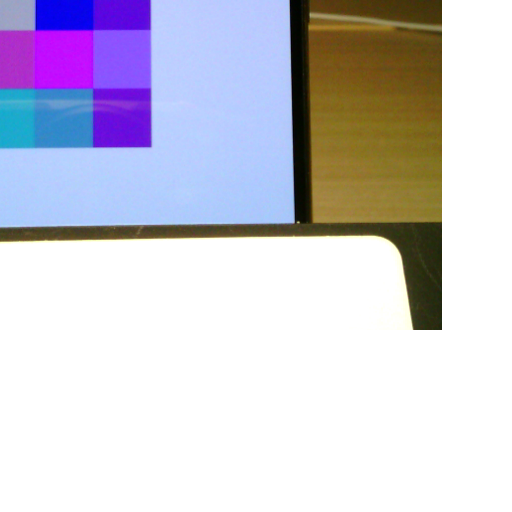

In [11]:
from PIL import Image

# 画像を開く
image = Image.open(IMG_PATH_iphone_RGB)  # 画像ファイルのパスを指定

# 切り出す領域の左上座標を指定 (x, y)
x = 202.62051391601562  # 例: x座標
y = 315.3358459472656  # 例: y座標

# 切り出す領域のサイズ (width, height)
width = 512  # 幅
height = 512  # 高さ

# 指定した座標から512x512の領域を切り出す
cropped_region = image.crop((x, y, x + width, y + height))

# 切り出した領域を保存する場合 (任意)

# 切り出した領域を表示する場合 (任意)
display(cropped_region)